In [1]:
import numpy as np
import dimod
import matplotlib.pyplot as plt
import dwave_networkx as dnx
import networkx as nx
import minorminer
import minorminer.layout as mml
%matplotlib inline
import dwave.inspector
import matplotlib as mpl
import math
from datetime import datetime
from pathlib import Path  
import pandas as pd
import os
import pickle
import random
from scipy.signal import savgol_filter
from scipy import interpolate
import h5py
plt.ioff()

####
#CAREFUL - put these files from kagome_embedding.ipynb in the correct folder
####
#load the graph and the dictionary
final_qubit_dictionary = np.load("../data/dict_qbit_to_lattice_periodic.npy", allow_pickle=True).flat[0]
bulk_sites = np.load("../data/sublatt_dict_truncer.npy", allow_pickle=True).flat[0]

Kag_graph = pickle.load(open('../data/Kag_graph_periodic.pickle', 'rb'))
unit_cells = np.load("../data/unitcells.npy", allow_pickle=True).flat[0]
unit_cells_down = np.load("../data/unitcells_down.npy", allow_pickle=True).flat[0]

#test that it works
#nx.draw(Kag_graph, final_qubit_dictionary)


In [5]:
hoverjlist = [0, 0.5, 1, 1.25, 2, 2.5, 3, 3.5, 4]
splist = [0.15, 0.25, 0.35, 0.4, 0.45, 0.55, 0.65]

tag1 = str(hoverjlist[4])
print(tag1)
# tag2 = 's=s=0.2'
tag2 = str(splist[-1])
print(tag2)

where_to_save = "../../data_prathus_runs/FT_KM/"
file_name = where_to_save + "KMpts_h=" + tag1 + "_s=" + tag2 + ".hdf5"
data = h5py.File(file_name, 'r')

2
0.65


                f.create_dataset("real_sigma_K", data = np.real(value_K))
                f.create_dataset("real_sigma_M", data = np.real(value_M))
                f.create_dataset("real_sigma_K_3", data = np.real(value_K**3))
                f.create_dataset("real_sigma_M_3", data = np.real(value_M**3))
                f.create_dataset("real_sigma_K_6", data = np.real(value_K**6))
                f.create_dataset("real_sigma_M_6", data = np.real(value_M**6))

                f.create_dataset("imag_sigma_K", data = np.imag(value_K))
                f.create_dataset("imag_sigma_M", data = np.imag(value_M))
                f.create_dataset("imag_sigma_K_3", data = np.imag(value_K**3))
                f.create_dataset("imag_sigma_M_3", data = np.imag(value_M**3))
                f.create_dataset("imag_sigma_K_6", data = np.imag(value_K**6))
                f.create_dataset("imag_sigma_M_6", data = np.imag(value_M**6))

In [15]:
import matplotlib.colors as mc
cvals  = [0.,1.0,2.0,3.0,4.5]
colors = ["red","orange","yellow","green","blue"]
norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), colors))
cmap = mc.LinearSegmentedColormap.from_list("", tuples)


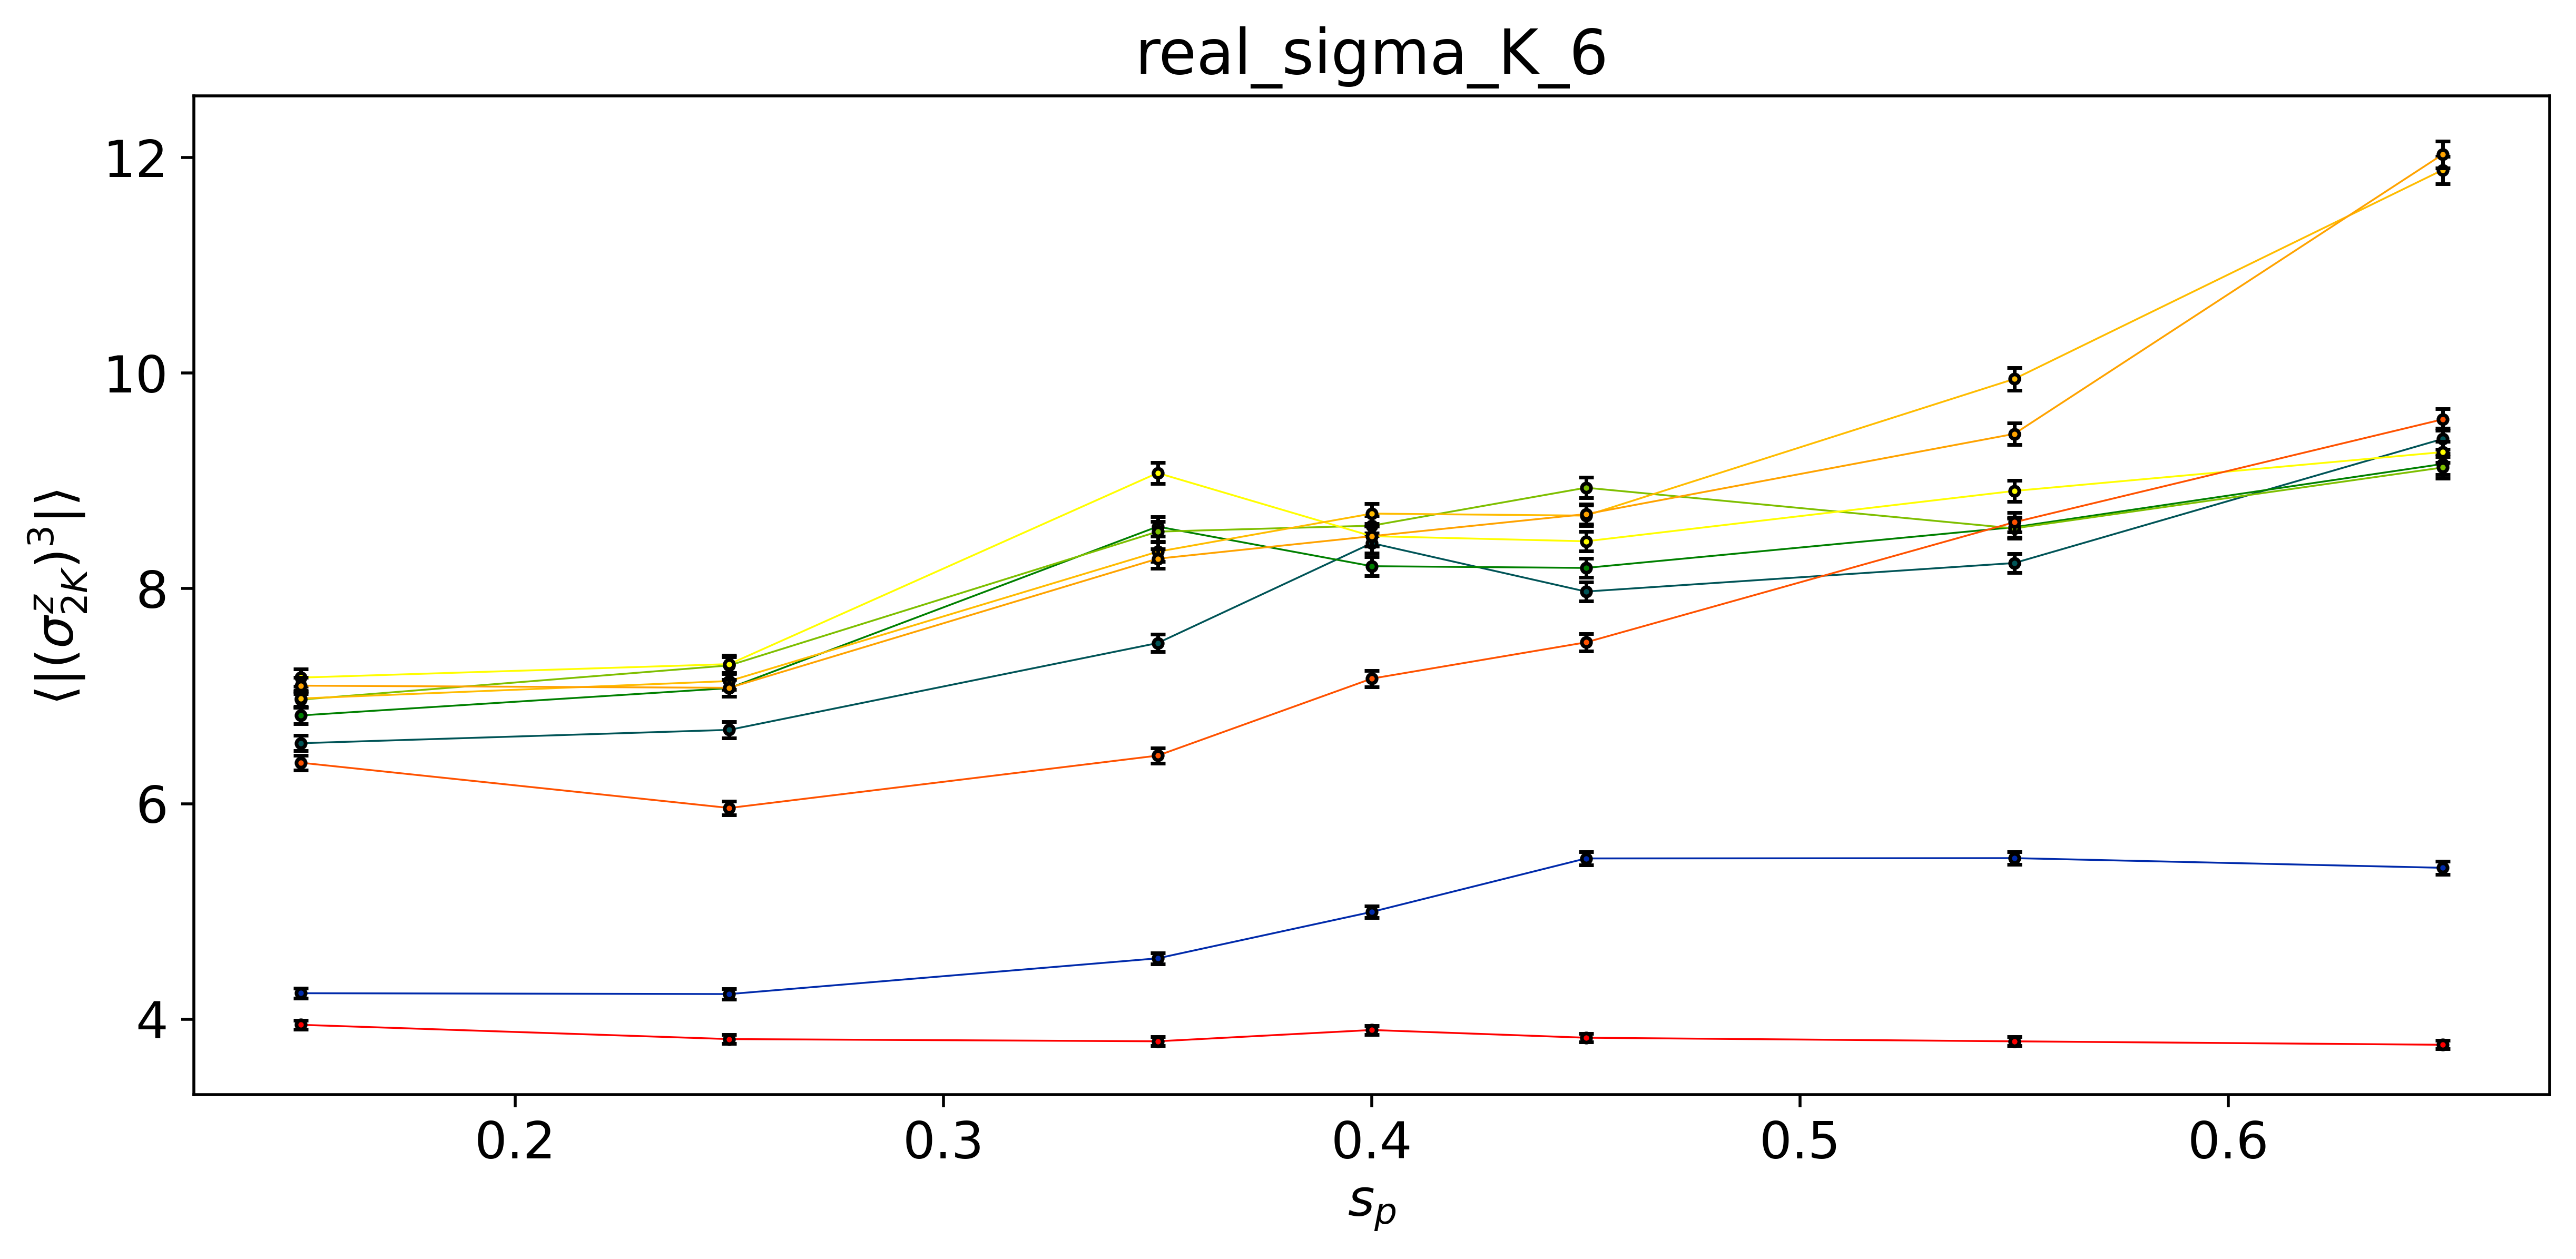

In [35]:
plt.rcParams['figure.dpi'] = 500
plt.rcParams.update({'font.size':14})
plt.figure(figsize=(10, 5))

# dataname = 'real_sigma_K_3'
# dataname = 'imag_sigma_K_3'
# dataname = 'real_sigma_K_6'


for k in range(len(hoverjlist)):
    y_arr = []
    y_err = []
    for j in range(len(splist)):
        tag1 = str(hoverjlist[k])
        tag2 = str(splist[j])

        where_to_save = "../../data_prathus_runs/FT_KM/"
        file_name = where_to_save + "KMpts_h=" + tag1 + "_s=" + tag2 + ".hdf5"
        data = h5py.File(file_name, 'r')
        # data_in = data[dataname]
        data_in = np.absolute(data['real_sigma_K_3'] + np.multiply(1.0*1j, data['imag_sigma_K_3']))
        # data_in = np.absolute(data['real_sigma_K_6'] + np.multiply(1.0*1j, data['imag_sigma_K_6']))


        y_arr.append(np.mean(data_in) / (168**(3/2)))
        y_err.append(np.std(data_in) / (168**(3/2)) /np.sqrt(20000))
    plt.errorbar(splist, y_arr, yerr=y_err, c= cmap(float(hoverjlist[k])/4.5),
            zorder = -k,
            ms=5,
            lw=0.5,
            fmt='.-',
            capsize=2,
            alpha=1,
            ecolor='black',
            markeredgecolor='black',
            elinewidth=1)

plt.xlabel(r'$ s_p $')
plt.ylabel(r'$\langle |(\sigma_{2K}^z)^3| \rangle$ ')
plt.title(dataname)

plt.tight_layout()
plt.show()


# histogram

In [47]:
tag1 = str(hoverjlist[4])
tag2 = str(splist[0])

where_to_save = "../../data_prathus_runs/FT_KM/"
file_name = where_to_save + "KMpts_h=" + tag1 + "_s=" + tag2 + ".hdf5"
data = h5py.File(file_name, 'r')
# data_real = data['real_sigma_K']
# data_imag = data['imag_sigma_K']

data_real = data['real_sigma_K_3']
data_imag = data['imag_sigma_K_3']

angles = np.arctan2(data_real, data_imag)

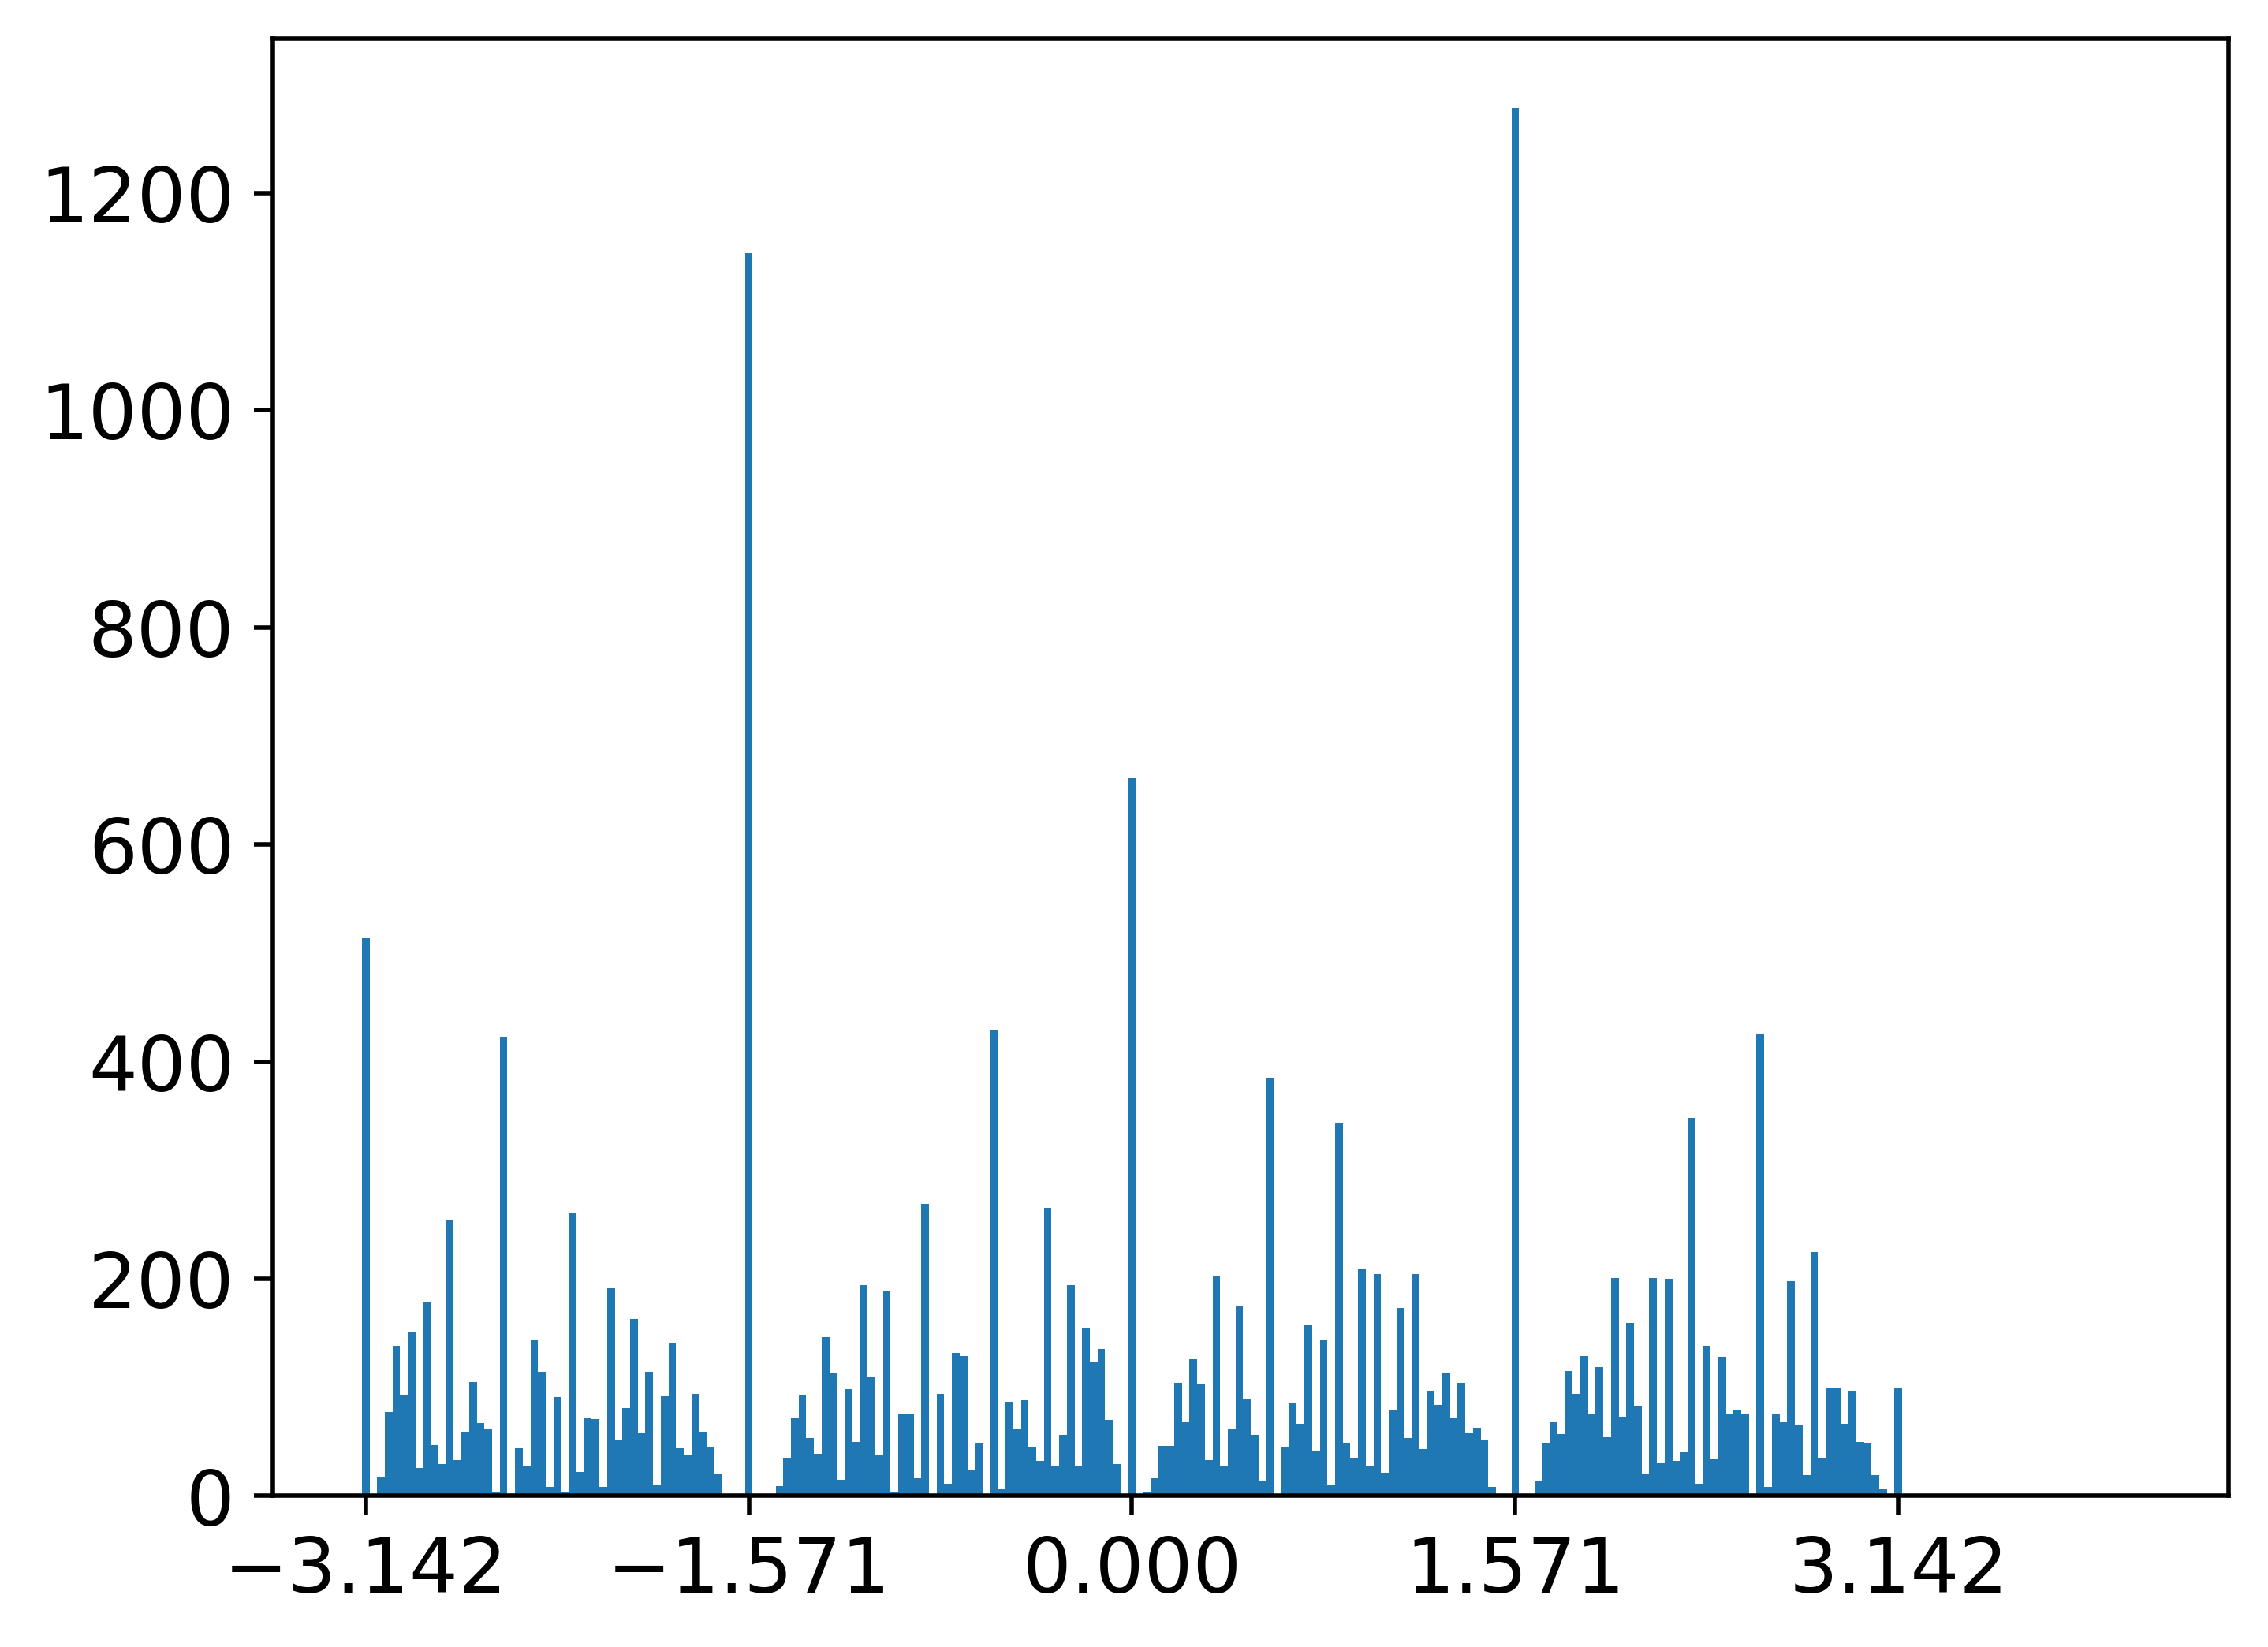

In [48]:
Nb = 400
bins_all = np.arange(-np.pi-2*np.pi/Nb, np.pi + 1, 2*2*np.pi/Nb)

# histo_count, histo_bins = np.histogram(angles, bins = bins_all)
# f.create_dataset("histo_bins", data = histo_bins)
# f.create_dataset("histo_count", data = histo_count)

plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi])

plt.hist(angles, bins = bins_all);
plt.show()